<a href="https://colab.research.google.com/github/MRazin172/LabProgram1/blob/main/LabProgram1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

In [ ]:
df = pd.read_csv("/content/Program_1_Dataset.csv")

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
df.shape

(506, 14)

In [ ]:
df.count()

Crime_Rate          506
Zone_proportion     506
Non_Retail_Acres    506
CHAS                506
NOX                 506
Avg_rooms           506
AGE                 506
Distance            506
RAD                 506
Property_TaxRate    506
PTRATIO             506
B                   506
LSTAT               506
MValue              506
dtype: int64

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

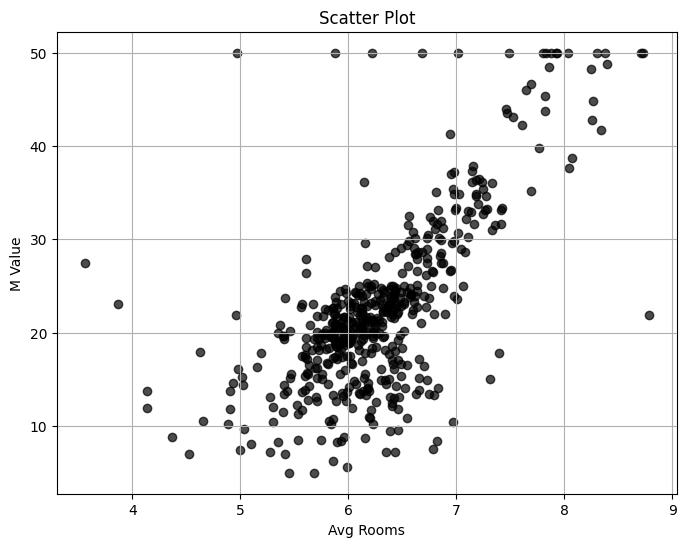

In [ ]:
column1 = df['Avg_rooms ']
column2 = df['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='black', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('Avg Rooms')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

There are many outliers in the datset

In [ ]:
# this Function is to remove outliers using Z-score normalization

def remove_outliers_z_score(dataframe, columns, threshold_positive=3, threshold_negative=-3):
    for col in columns:
        z_scores = np.abs((dataframe[col] - dataframe[col].mean()) / dataframe[col].std())
        dataframe = dataframe[(z_scores < threshold_positive) & (z_scores > threshold_negative)]
    return dataframe

columns = ['Avg_rooms ', 'MValue']

#we create a new dataset as df_no_outliers
df_no_outliers = remove_outliers_z_score(df, columns, threshold_positive=3, threshold_negative=-3)


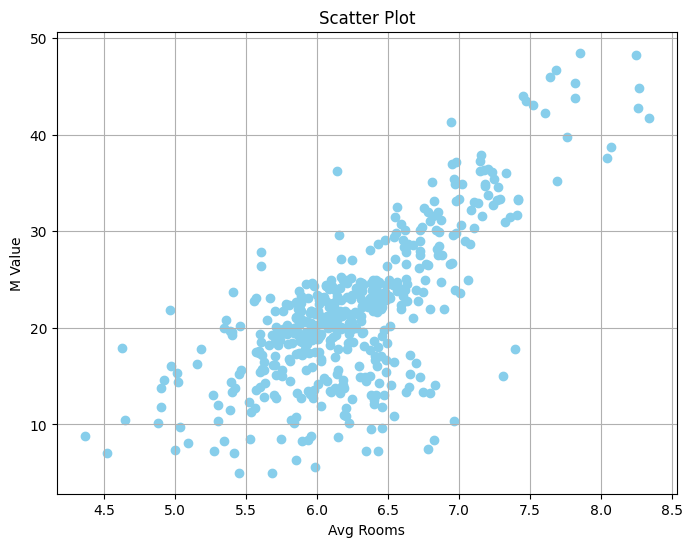

In [ ]:
column1 = df_no_outliers ['Avg_rooms ']
column2 = df_no_outliers ['MValue']

plt.figure(figsize=(8, 6))
plt.scatter(column1, column2, color='skyblue', alpha=1)
plt.title('Scatter Plot')
plt.xlabel('Avg Rooms')
plt.ylabel('M Value')
plt.grid(True)
plt.show()

Here, we have applied z-scoer normalization, hence we can see that the outliers have been discarded in the above new scatterplot.

In [ ]:
X = df_no_outliers[['Avg_rooms ']]  #the feature we have is Avg_rooms
y = df_no_outliers['MValue']  # our target variable is MValue

# splitting the dataset into train and test sets in 70 by 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = linear_reg_model.coef_
print("Coefficients:", coefficients)

intercept = linear_reg_model.intercept_
print("Intercept:", intercept)


Coefficients: [9.27775995]
Intercept: -36.49724422306973


In [ ]:
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)


mse_tr = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_te = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Evaluation:")
print("Mean Squared Error (MSE) on Training Set:", mse_tr)
print("R-squared (R2) on Training Set:", r2_train)
print("\nTesting Set Evaluation:")
print("Mean Squared Error (MSE) on Testing Set:", mse_te)
print("R-squared (R2) on Testing Set:", r2_test)


Training Set Evaluation:
Mean Squared Error (MSE) on Training Set: 30.43594332201146
R-squared (R2) on Training Set: 0.5166954352067943

Testing Set Evaluation:
Mean Squared Error (MSE) on Testing Set: 24.522118696183345
R-squared (R2) on Testing Set: 0.5538277014023592


INFERENCE: 1. In the model created we can see that the mse value for both training and testing is near to each other.
This indicates that the model performed with almost same efficiency during the training and testing phase.

We got the training mse as 30 and testing mse as 24, this shows that the modle gave better results in testing.

2. The R-squared indicates how efficinet our model is.
We got the values as 0.51 and 0.55 respectively. this tells us that the model is only fairly good.